In [ ]:

import os
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
os.chdir('/content/drive/MyDrive/data visualisation/Ressource journée 3/data')

In [ ]:
ls data

ls: cannot access 'data': No such file or directory


# Loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data visualisation/Ressource journée 3/data/vente_maillots_de_bain.xlsx',sheet_name='Sheet2')
df.tail(5)

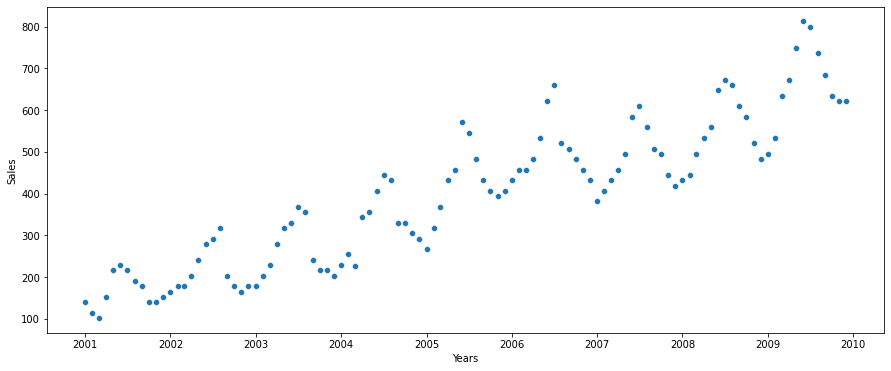

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x="Years", y="Sales", data=df)
plt.show()

In [ ]:
df["time"] = np.arange(1, 109, 1)
df

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5
...,...,...,...
103,2009-08-01,736.6,104
104,2009-09-01,685.5,105
105,2009-10-01,635.0,106
106,2009-11-01,622.3,107


In [ ]:
df_train = df.loc[:81]
df_test = df.loc[82:]

In [ ]:
x_train = df_train[["time"]].values
x_test = df_test[["time"]].values

y_train = df_train[["Sales"]].values
y_test = df_test[["Sales"]].values

#Utilisation de Sklearn pour créer un modèle regressif

# regression lineaire simple un parametre temps


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_trend = LinearRegression()

In [ ]:
model_trend.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_fitted_values = model_trend.predict(x_train)
y_predicted_value = model_trend.predict(x_test)

pour calculer l'interval de confiance il faut
- calculer l'erreur
- calculer l'ecart type de l'erreur
- choisir quel interval de confiance on souhaite

In [ ]:
error = y_test - y_predicted_value # calcul de l'erreur
std_error = error.std() # calcul de l'écart type de l'erreur
interval = 4.4 * std_error   #4.4 CORRESPOND A UNE VALEUR PRISE SUR LE NET  

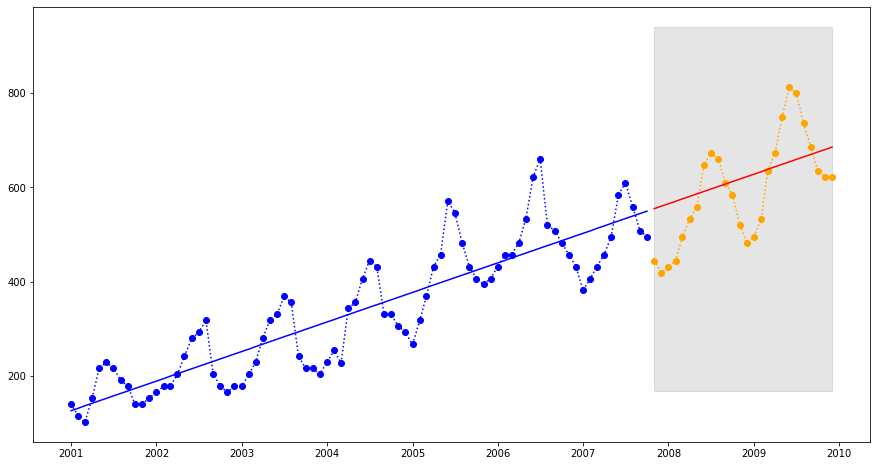

In [ ]:
plt.figure(figsize=(15, 8))
# train base
plt.plot(df_train["Years"], y_train, "bo:")
plt.plot(df_train["Years"], y_fitted_values, "b")
#test base
plt.plot(df_test["Years"], y_test, "o:", color="orange")
plt.plot(df_test["Years"], y_predicted_value, color="red")

marge_min = y_predicted_value - interval
marge_max = y_predicted_value + interval

plt.fill_between(df_test["Years"], marge_max[0], marge_min[0], alpha=0.1, color="black")

# plt.show()

# Modele additif rend plus precis

In [ ]:
df_train1 = df_train.copy()
df_test1 = df_test.copy()                          # cest toujours preferable de faire une copy profonde 

In [ ]:
df_train1["month"] = df_train1["Years"].dt.month_name()
df_test1["month"] = df_test1["Years"].dt.month_name()                   # ajoute la colonne mois 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


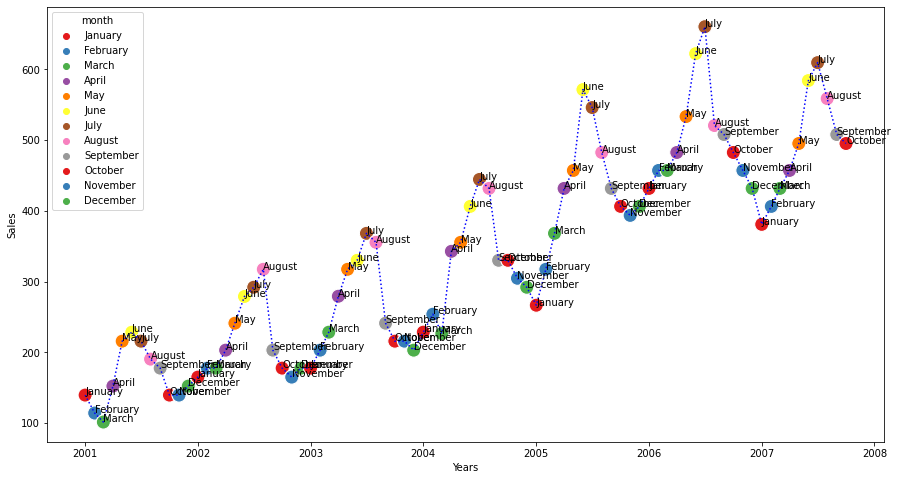

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_train1["Years"],df_train1["Sales"], "b:")
sns.scatterplot("Years", "Sales", data= df_train1, s=200 , hue="month", palette="Set1")         # s=200 donne la grosseur des points  palette vcest pour les couleurs 
for index_line in range(len(df_train1)):
  plt.text (df_train1["Years"][index_line], df_train1["Sales"][index_line], df_train1["month"][index_line])      # mettre les mois sur le graphe

# one-hot encoding : transformer une variable categorie en variable numerique

In [ ]:
dum_train= pd.get_dummies(df_train1["month"])  # methodes de pandas pour one hot encoding

In [ ]:
dum_train

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0,0,0,0,0,0,1,0,0,0,0,0
78,0,0,0,0,0,1,0,0,0,0,0,0
79,0,1,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train1

In [ ]:
df_train1= pd.concat((df_train1 , dum_train), axis=1)           # coller les deux dataframes de maniere horizontales 

In [ ]:
df_train1.head(10)

,Years,Sales,time,month,April,August,December,February,January,July,June,March,May,November,October,September
0,2001-01-01,139.7,1,January,0,0,0,0,1,0,0,0,0,0,0,0
1,2001-02-01,114.3,2,February,0,0,0,1,0,0,0,0,0,0,0,0
2,2001-03-01,101.6,3,March,0,0,0,0,0,0,0,1,0,0,0,0
3,2001-04-01,152.4,4,April,1,0,0,0,0,0,0,0,0,0,0,0
4,2001-05-01,215.9,5,May,0,0,0,0,0,0,0,0,1,0,0,0
5,2001-06-01,228.6,6,June,0,0,0,0,0,0,1,0,0,0,0,0
6,2001-07-01,215.9,7,July,0,0,0,0,0,1,0,0,0,0,0,0
7,2001-08-01,190.5,8,August,0,1,0,0,0,0,0,0,0,0,0,0
8,2001-09-01,177.8,9,September,0,0,0,0,0,0,0,0,0,0,0,1
9,2001-10-01,139.7,10,October,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
dum_test= pd.get_dummies(df_test1["month"])      # methodes de pandas
df_test1= pd.concat((df_test1 , dum_test), axis=1) 

In [ ]:
columns_for_regressions= ["April",	"August",	"December",	"February", "January", "July",	"June",	"March",	"May",	"November",	"October",	"September", "time"]

In [ ]:
x_train_add = df_train1[columns_for_regressions].values
y_train_add = df_train1["Sales"].values

In [ ]:
x_test_add = df_test1[columns_for_regressions].values 
y_test_add = df_test1["Sales"].values

# regression lineaire(modele additif)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_add= LinearRegression()

In [ ]:
model_add.fit(x_train_add , y_train_add)       #pour effectuer un entrainement .fit


LinearRegression()

In [ ]:
y_fitted_values_add = model_add.predict(x_train_add)
y_predicted_values_add = model_add.predict(x_test_add)

In [ ]:
error_add = y_test_add - y_predicted_values_add # calcul de l'erreur
std_error_add = error_add.std() # calcul de l'écart type de l'erreur
interval_add = 4.4 * std_error_add   #4.4 CORRESPOND A UNE VALEUR PRISE SUR LE NET  

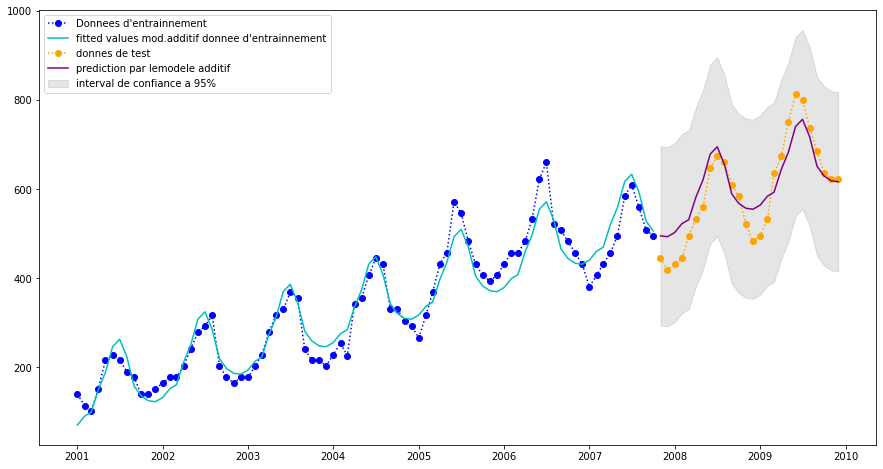

In [ ]:
plt.figure(figsize=(15,8))

plt.plot(df_train1["Years"], y_train_add, "o:", color="blue")
plt.plot(df_train1["Years"], y_fitted_values_add, "c")

plt.plot(df_test1["Years"], y_test_add, "o:", color="orange")
plt.plot(df_test1["Years"], y_predicted_values_add, color="purple")

marge_max_add= y_predicted_values_add - interval_add
marge_min_add= y_predicted_values_add + interval_add

plt.fill_between(df_test1["Years"], marge_max_add, marge_min_add, alpha=0.1, color="black")
plt.legend(["Donnees d'entrainnement", "fitted values mod.additif donnee d'entrainnement", "donnes de test", "prediction par lemodele additif", "interval de confiance a 95%"],loc=2)


# Modele multiplicatif

In [ ]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [ ]:
df_train2["month"] = df_train2["Years"].dt.month_name()
df_test2["month"] = df_test2["Years"].dt.month_name() 

In [ ]:
df_train2

,Years,Sales,time,month
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May
...,...,...,...,...
77,2007-06-01,584.2,78,June
78,2007-07-01,609.6,79,July
79,2007-08-01,558.8,80,August
80,2007-09-01,508.0,81,September


### Etape 1: regression lineaire simple

In [ ]:
x_train_mul = df_train2[["time"]].values
x_test_mul = df_test2[["time"]].values

y_train_mul = df_train2[["Sales"]].values
y_test_mul = df_test2[["Sales"]].values

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_trend_mul = LinearRegression()

In [ ]:
model_trend_mul.fit(x_train_mul, y_train_mul)                      # l'entrainnement est faite nous avons notre tendance

LinearRegression()

In [ ]:
y_fitted_values_mul=model_trend_mul.predict(x_train_mul)            # valeur de la tendance pour la base d'entrainnement

In [ ]:
df_train2["trend_prediction"]=y_fitted_values_mul

In [ ]:
df_train2.head()

,Years,Sales,time,month,trend_prediction
0,2001-01-01,139.7,1,January,125.723744
1,2001-02-01,114.3,2,February,130.955437
2,2001-03-01,101.6,3,March,136.187130
3,2001-04-01,152.4,4,April,141.418823
4,2001-05-01,215.9,5,May,146.650516


# Etape2 :calcul de la deviation saisonniere

In [ ]:
df_train2["seasonal_deviation"]= df_train2["Sales"]/df_train2["trend_prediction"]
df_train2

,Years,Sales,time,month,trend_prediction,seasonal_deviation
0,2001-01-01,139.7,1,January,125.723744,1.111166
1,2001-02-01,114.3,2,February,130.955437,0.872816
2,2001-03-01,101.6,3,March,136.187130,0.746032
3,2001-04-01,152.4,4,April,141.418823,1.077650
4,2001-05-01,215.9,5,May,146.650516,1.472208
...,...,...,...,...,...,...
77,2007-06-01,584.2,78,June,528.564118,1.105259
78,2007-07-01,609.6,79,July,533.795811,1.142010
79,2007-08-01,558.8,80,August,539.027504,1.036682
80,2007-09-01,508.0,81,September,544.259197,0.933379


# Calcul du facteur de correction

In [ ]:
correction_factor =df_train2[[ "month","seasonal_deviation"]].groupby("month").mean().rename(columns={"seasonal_deviation": "correction_factor"}) # represente la moyenne

# Ajout du facteur de correction

In [ ]:
df_train2= df_train2.merge(correction_factor, on="month")         # la methode merge permet de faire la jointure 
df_train2

,Years,Sales,time,month,trend_prediction,seasonal_deviation,correction_factor
0,2001-01-01,139.7,1,January,125.723744,1.111166,0.838674
1,2002-01-01,165.1,13,January,188.504062,0.875843,0.838674
2,2003-01-01,177.8,25,January,251.284380,0.707565,0.838674
3,2004-01-01,228.6,37,January,314.064698,0.727876,0.838674
4,2005-01-01,266.7,49,January,376.845016,0.707718,0.838674
...,...,...,...,...,...,...,...
77,2002-12-01,177.8,24,December,246.052687,0.722609,0.800370
78,2003-12-01,203.2,36,December,308.833005,0.657961,0.800370
79,2004-12-01,292.1,48,December,371.613323,0.786032,0.800370
80,2005-12-01,406.4,60,December,434.393641,0.935557,0.800370


In [ ]:
correction_factor

,correction_factor
month,
April,1.028787
August,1.192485
December,0.800370
February,0.862502
January,0.838674
July,1.310564
June,1.292764
March,0.860030
May,1.158041


# Utilisation du modele multiplicatif  qui  reprensente le produit de la moyenne avek le trend prediction

In [ ]:
df_train2["multiplicatif_model_prediction"]=df_train2["trend_prediction"]*df_train2["correction_factor"]
df_train2

,Years,Sales,time,month,trend_prediction,seasonal_deviation,correction_factor,multiplicatif_model_prediction
0,2001-01-01,139.7,1,January,125.723744,1.111166,0.838674,105.441259
1,2002-01-01,165.1,13,January,188.504062,0.875843,0.838674,158.093491
2,2003-01-01,177.8,25,January,251.284380,0.707565,0.838674,210.745723
3,2004-01-01,228.6,37,January,314.064698,0.727876,0.838674,263.397955
4,2005-01-01,266.7,49,January,376.845016,0.707718,0.838674,316.050187
...,...,...,...,...,...,...,...,...
77,2002-12-01,177.8,24,December,246.052687,0.722609,0.800370,196.933083
78,2003-12-01,203.2,36,December,308.833005,0.657961,0.800370,247.180540
79,2004-12-01,292.1,48,December,371.613323,0.786032,0.800370,297.427996
80,2005-12-01,406.4,60,December,434.393641,0.935557,0.800370,347.675452


In [ ]:
df_test2["trend_prediction"]=model_trend_mul.predict(x_test_mul)

In [ ]:
df_test2 = df_test2.merge(correction_factor, on= "month")                    # avek merge on affiche les donnes de maniere desordonne par consequent pour avoir le graphe il faut remettre en ordre

In [ ]:
df_test2["multiplicatif_model_prediction"]=df_test2["trend_prediction"]*df_test2["correction_factor"]
df_test2

,Years,Sales,time,month,trend_prediction,correction_factor,multiplicatif_model_prediction
0,2007-11-01,444.5,83,November,554.722584,0.810003,449.327116
1,2008-11-01,520.7,95,November,617.502902,0.810003,500.179379
2,2009-11-01,622.3,107,November,680.283220,0.810003,551.031643
3,2007-12-01,419.1,84,December,559.954277,0.800370,448.170365
4,2008-12-01,482.6,96,December,622.734595,0.800370,498.417821
5,2009-12-01,622.3,108,December,685.514913,0.800370,548.665277
6,2008-01-01,431.8,85,January,565.185970,0.838674,474.006884
7,2009-01-01,495.3,97,January,627.966288,0.838674,526.659116
8,2008-02-01,444.5,86,February,570.417663,0.862502,491.986499
9,2009-02-01,533.4,98,February,633.197981,0.862502,546.134663


In [ ]:
df_train2.sort_values(by="Years", inplace=True, ignore_index=True)
df_test2.sort_values(by="Years", inplace=True, ignore_index=True)
df_test2

,Years,Sales,time,month,trend_prediction,correction_factor,multiplicatif_model_prediction
0,2007-11-01,444.5,83,November,554.722584,0.810003,449.327116
1,2007-12-01,419.1,84,December,559.954277,0.800370,448.170365
2,2008-01-01,431.8,85,January,565.185970,0.838674,474.006884
3,2008-02-01,444.5,86,February,570.417663,0.862502,491.986499
4,2008-03-01,495.3,87,March,575.649356,0.860030,495.075746
5,2008-04-01,533.4,88,April,580.881049,1.028787,597.602891
6,2008-05-01,558.8,89,May,586.112743,1.158041,678.742347
7,2008-06-01,647.7,90,June,591.344436,1.292764,764.468731
8,2008-07-01,673.1,91,July,596.576129,1.310564,781.850986
9,2008-08-01,660.4,92,August,601.807822,1.192485,717.646632


# CALCUL de lerreur
# de l'ecart type
# intervalle de confiance

In [ ]:
error_mul= df_test2["Sales"]-df_test2["multiplicatif_model_prediction"]
std_error_mul = error_mul.std()
interval_mul= 4.4*std_error_mul

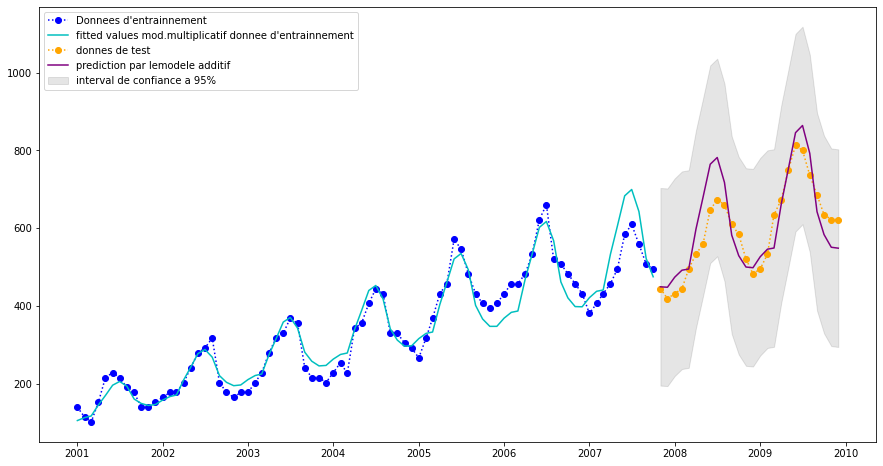

In [ ]:
plt.figure(figsize=(15,8))

# affichage de la base d'entrainnement

plt.plot(df_train2["Years"], df_train2["Sales"], "o:", color="blue")
plt.plot(df_train2["Years"], df_train2["multiplicatif_model_prediction"], color="c")
 
# affichage des donnees de la base de test
plt.plot(df_test2["Years"], df_test2["Sales"], "o:", color="orange")
plt.plot(df_test2["Years"], df_test2["multiplicatif_model_prediction"], color="purple")

marge_max_mul= df_test2["multiplicatif_model_prediction"] + interval_mul
marge_min_mul= df_test2["multiplicatif_model_prediction"]  - interval_mul

plt.fill_between(df_test2["Years"], marge_max_mul, marge_min_mul, alpha=0.1, color="black")
plt.legend(["Donnees d'entrainnement", "fitted values mod.multiplicatif donnee d'entrainnement", "donnes de test", "prediction par lemodele additif", "interval de confiance a 95%"],loc=2)


# Autocorrélation + stationnarisation

In [ ]:
df_train3 = df_train.copy()
df_test3 = df_test.copy()

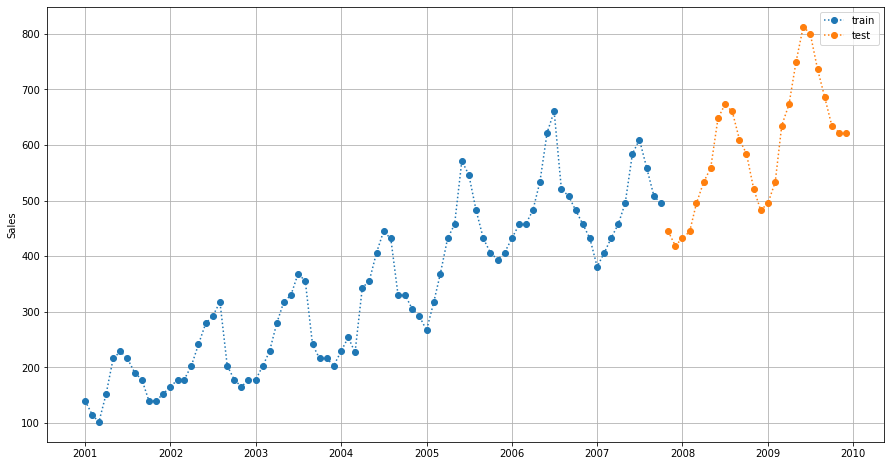

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_train3["Years"], df_train3["Sales"], "o:")
plt.plot(df_test3["Years"], df_test3["Sales"], "o:")
plt.legend(["train", "test"])
plt.ylabel("Sales")
plt.grid()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import  plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 0, 'Lags')

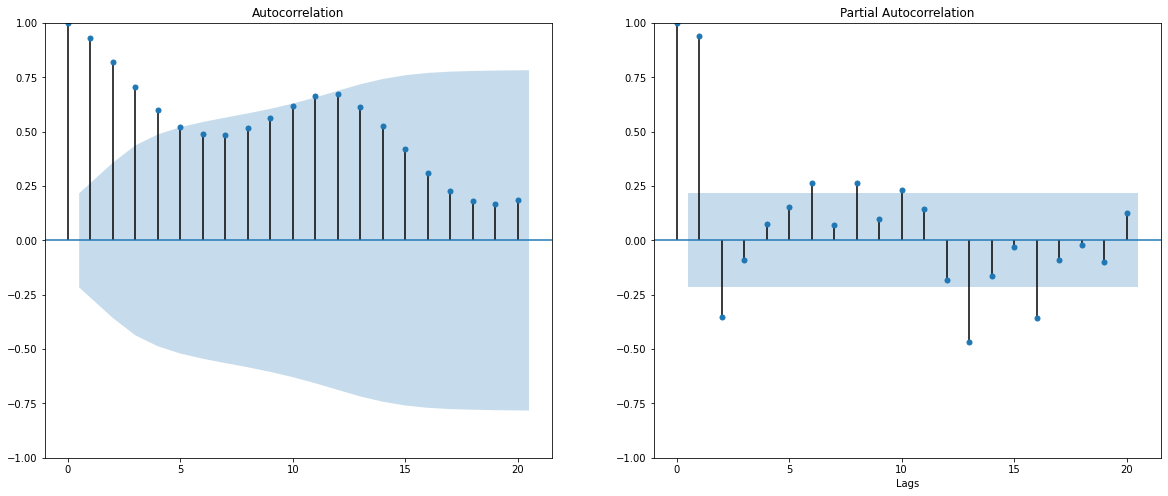

In [ ]:
fig, ax= plt.subplots (nrows=1, ncols=2, figsize=(20,8))
autocor= plot_acf(df_train3["Sales"], ax=ax[0])
plt.xlabel("Lags")
partial_autocor= plot_pacf(df_train3["Sales"], ax=ax[1])
plt.xlabel("Lags")


In [ ]:
difference= df_train3["Sales"].diff()
difference.head()

0     NaN
1   -25.4
2   -12.7
3    50.8
4    63.5
Name: Sales, dtype: float64

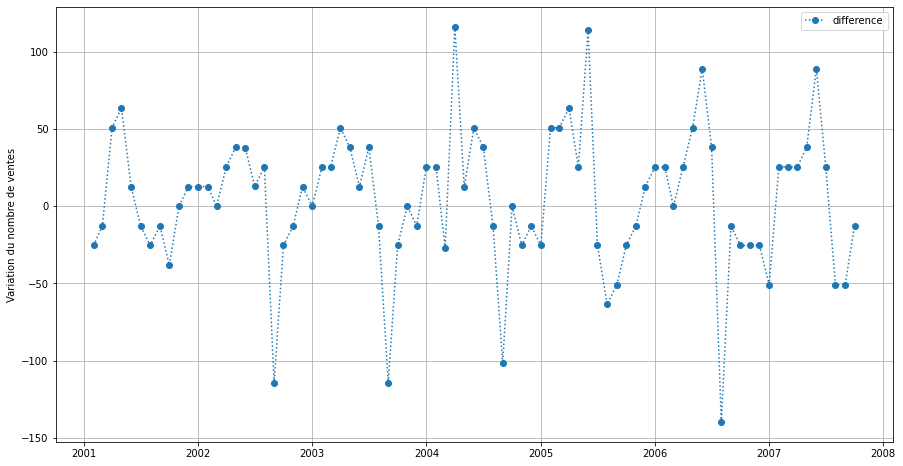

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df_train3["Years"], difference, "o:")
plt. legend(["difference"])
plt.ylabel("Variation du nombre de ventes")
plt.grid()
plt.show()

In [ ]:
difference.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


Text(0.5, 0, 'Lags')

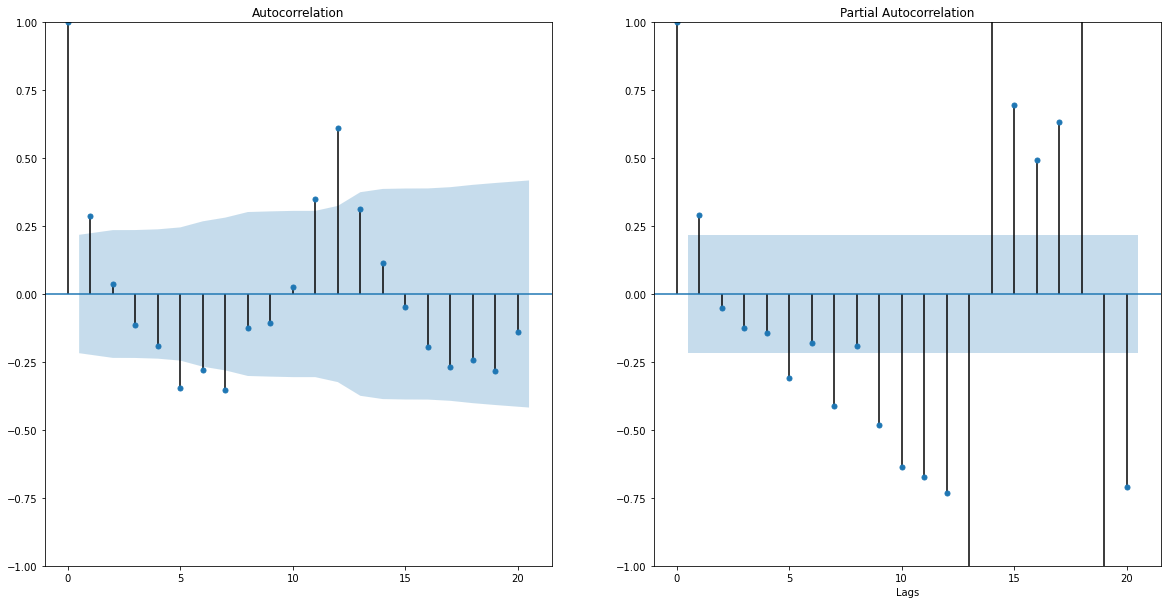

In [ ]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(20,10))
autocor= plot_acf (difference, ax=ax[0])
plt.xlabel("Lags")
partial_autocor= plot_pacf(difference, ax=ax[1])
plt.xlabel("Lags")


## Modele Auto REGRESSIF 
on le noye AR(p)
avec P= number of lags (taille du cycle )
dans notre exemple p=12(MOIS)
le modele que l'on va construire est AR(12)
Sa prediction pour un instant t depend des 12 derniers precedents


In [ ]:
x_train= df_train3.set_index("Years")
x_test = df_test3.set_index("Years")

x_train.drop(columns=["time"], inplace= True)
x_test.drop(columns=["time"], inplace= True)

In [ ]:
x_train.head()

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9


In [ ]:
from  statsmodels.tsa.ar_model import  AutoReg
model_ar = AutoReg(x_train, lags=12).fit()                       # LAGS TAille du modele

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
fitted_values = model_ar.fittedvalues

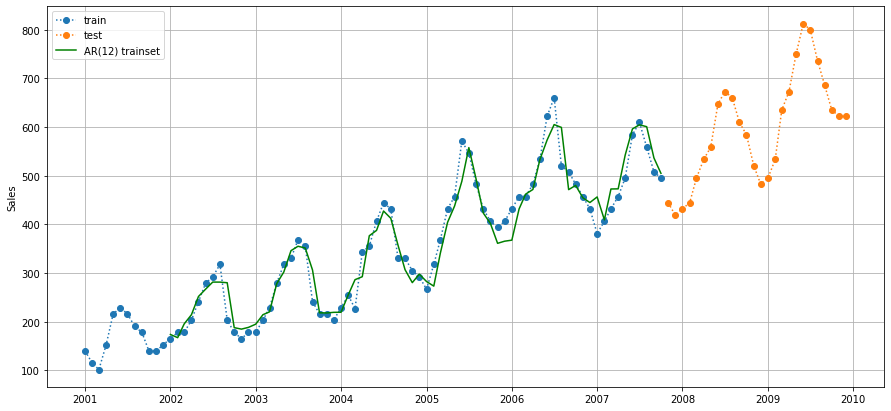

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df_train3["Years"], df_train3["Sales"], "o:")
plt.plot(df_test3["Years"], df_test3["Sales"], "o:")
plt.plot(fitted_values, "g-")
plt.legend(["train","test", "AR(12) trainset"])
plt.ylabel("Sales")
plt.grid()
plt.show()

In [ ]:
import datetime

In [ ]:
start= datetime.datetime.strptime("2007-11-01", "%Y-%m-%d")
end= datetime.datetime.strptime("2009-12-01", "%Y-%m-%d")

In [ ]:
prediction_test=model_ar.predict(start, end)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/deterministic.py:157: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and NumericIndex with a unit increment support extending. The index is set will contain the position relative to the data length.
  UserWarning,


In [ ]:
error= model_ar.resid
std_error= error.std()
interval_ar= 4.4*std_error


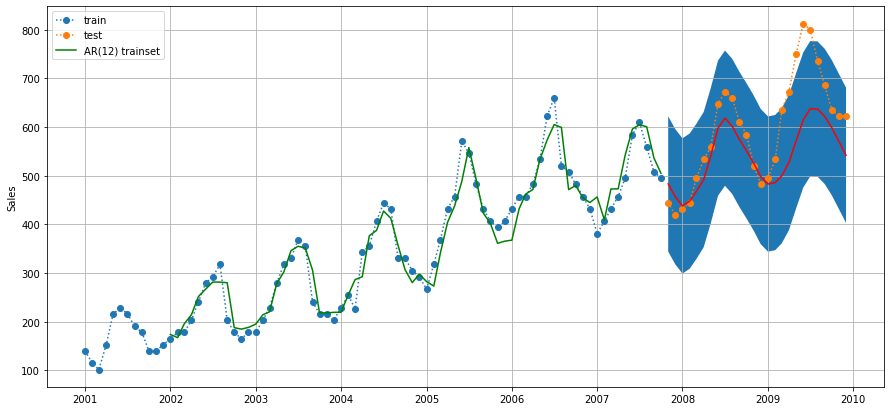

In [ ]:
plt.figure(figsize=(15, 7))
# vérite terrain
plt.plot(df_train3["Years"], df_train3["Sales"], "o:")
plt.plot(df_test3["Years"], df_test3["Sales"], "o:")
# prediction du modele
plt.plot(fitted_values, "g-")
plt.plot(prediction_test, "r-")
# intervalle de confiance
plt.fill_between(df_test3["Years"], prediction_test.values+interval_ar, prediction_test.values-interval_ar)
plt.legend(["train","test", "AR(12) trainset"])
plt.ylabel("Sales")
plt.grid()
plt.show()